In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"])
test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"])

In [3]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [4]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4


In [5]:
train.shape

(161297, 7)

In [6]:
test.shape

(53766, 7)

In [7]:
train.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
test.isna().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
data = pd.concat([train,test])

In [10]:
data.shape

(215063, 7)

# Data Cleaning

In [11]:
data.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [12]:
percent_missing = (data.isnull().sum() * 100 / len(data))
percent_missing

uniqueID       0.000000
drugName       0.000000
condition      0.555186
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

In [13]:
data_clean = data.dropna(how= "any", axis = 0)
data_clean.shape

(213869, 7)

## Exploratory Data Analysis

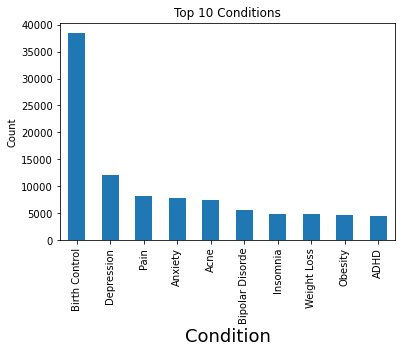

In [14]:
data_clean["condition"].value_counts().head(10).plot.bar()
plt.title("Top 10 Conditions")
plt.xlabel("Condition", fontsize = 18)
plt.ylabel("Count")
plt.show();

"Birth Control" is the most common condition.

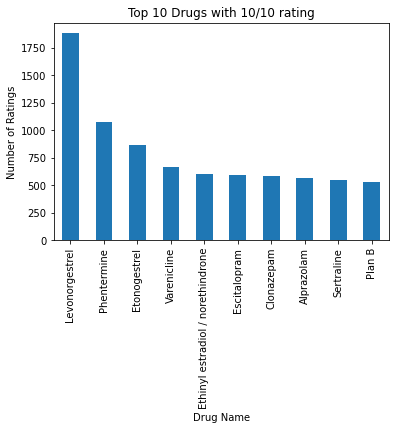

In [15]:
data_clean.loc[data_clean.rating == 10, "drugName"].value_counts().nlargest(10).plot.bar()
plt.title("Top 10 Drugs with 10/10 rating")
plt.xlabel("Drug Name")
plt.ylabel("Number of Ratings")
plt.show();

Levonorgestrel is the top rated drugs with highest number of rating.

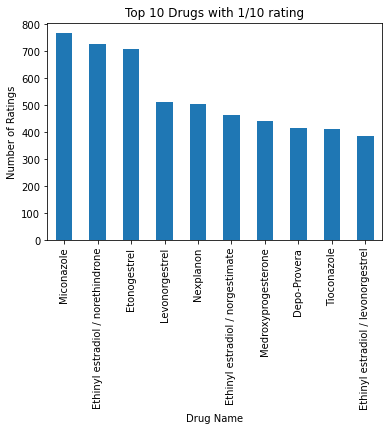

In [16]:
data_clean.loc[data_clean.rating == 1, "drugName"].value_counts().nlargest(10).plot.bar()
plt.title("Top 10 Drugs with 1/10 rating")
plt.xlabel("Drug Name")
plt.ylabel("Number of Ratings")
plt.show();

"Miconazole" is the lowest rated drugs

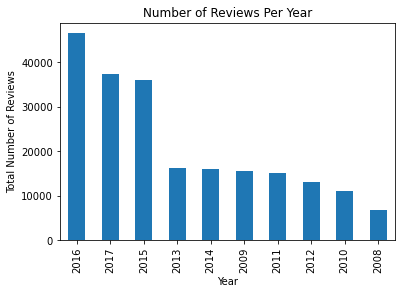

In [17]:
data_clean['date'].dt.year.value_counts().nlargest(10).plot.bar()
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Reviews")
plt.show();

2016 has the most number of reviews.

In [18]:
data_clean.groupby('condition')['drugName'].nunique().nlargest(10)

condition
Not Listed / Othe       253
Pain                    219
Birth Control           181
High Blood Pressure     146
Acne                    127
Depression              115
Rheumatoid Arthritis    107
Diabetes, Type 2         97
Allergic Rhinitis        95
Insomnia                 85
Name: drugName, dtype: int64

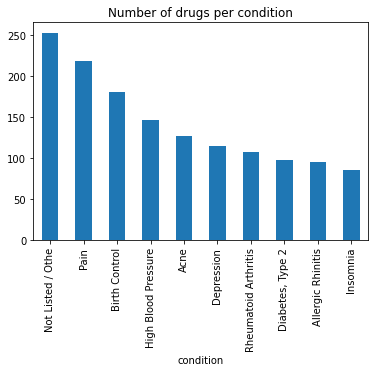

In [19]:
data_clean.groupby('condition')['drugName'].nunique().nlargest(10).plot(kind = 'bar')
plt.title('Number of drugs per condition')
plt.show();

<AxesSubplot:xlabel='rating'>

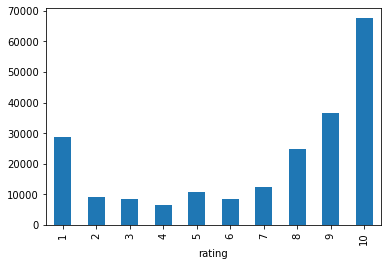

In [20]:
data_clean.groupby('rating').size().plot(kind = 'bar')

In [21]:
avg_rating = data_clean['rating'].groupby(data_clean['drugName']).mean()

<AxesSubplot:>

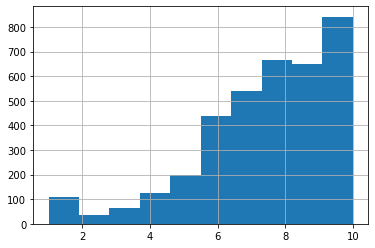

In [22]:
avg_rating.hist()

<AxesSubplot:xlabel='drugName'>

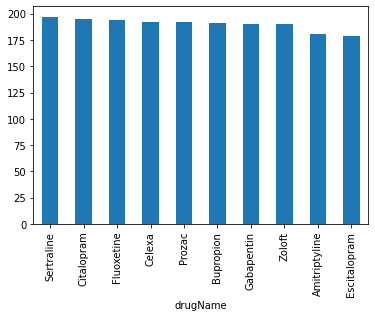

In [23]:
data_clean.groupby('drugName')['usefulCount'].nunique().nlargest(10).plot(kind = 'bar')